In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import nonzero
# plt.rcParams.update({'text.usetex':False})

import flavio
import flavio.plots
import pandas as pd

import matplotlib.ticker as tck

# Rescaling data using HAMMER reweighting method

In [3]:
# Functions
def compute_J_from_vec(vec, wilson_coef=None):
    obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']
    
    if wilson_coef is None:
        print("Setting wilson to sm...")
        #This is the SM
        wilson_coef = flavio.WilsonCoefficients()
        wilson_coef.set_initial({'C9_bsmumu' : 0., 'C10_bsmumu' : 0.}, scale = 100)


    si = {obs: flavio.np_prediction('%s(B0->K*mumu)' % obs, wilson_coef, vec['q2']) for obs in obs_si}

    return compute_J(si, vec['k'], vec['l'], vec['p'])


def compute_J(si, k, l, p):
    ''' Computes the differential branching factor 
    
    si : dict
        dictionary of all S_i terms
    k : float
        theta_k
    l : float
        theta l
    p : float
        phi
    '''

    fl =  3/4*(1 - si['FL']) * (np.sin(k) ** 2) + si['FL'] * (np.cos(k) ** 2) + 1/4 * (1 - si['FL']) * (np.sin(k) ** 2) * np.cos(2*l) - si['FL'] * (np.cos(k) ** 2) * np.cos(2*l)
    s3 = si['S3'] * (np.sin(k) ** 2) * (np.sin(l) ** 2) * np.cos(2 * p)
    s4 = si['S4'] * np.sin(2 * k) * np.sin(2*l) * np.cos(p)
    s5 = si['S5'] * np.sin(2 * k) * np.sin(l) * np.cos(p)
    afb = 4/3 * si['AFB'] * (np.sin(k) ** 2) * np.cos(l)
    s7 = si['S7'] * np.sin(2 * k) * np.sin(l) * np.sin(p)
    s8 = si['S8'] * np.sin(2 * k) * np.sin(2 * l) * np.sin(p)
    s9 = si['S9'] * (np.sin(k) ** 2) * (np.sin(l) ** 2) * np.sin(2 * p)

    return sum([fl, s3, s4, s5, afb, s7, s8, s9])





def format_range(x, a, b):
    ''' given uniform x in range [0,1], ouptut uniform in range [a,b] '''
    return x * (b - a) + a


## Read in data

In [4]:
sm = pd.read_csv('data/toy_data_c9_0_c10_0_2021_10_29_11.csv', index_col=0)

scenario = pd.read_csv('data/toy_data_c9_-0.46_c10_0.46_2021_10_29_13.csv', index_col=0)

## Compute new coefficients

In [5]:
obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']
q2 = 4


wc_sm = flavio.WilsonCoefficients()
si_sm = {obs: flavio.np_prediction('%s(B0->K*mumu)' % obs, wc_sm, q2) for obs in obs_si}

wc_np = flavio.WilsonCoefficients()

c9_busmsm = 100
c10_busmsm = -100

wc_np.set_initial({'C9_bsmumu' : c9_busmsm, 'C10_bsmumu' : c10_busmsm}, scale = 100)

si_np = {obs: flavio.np_prediction('%s(B0->K*mumu)' % obs, wc_np, q2) for obs in obs_si}

In [40]:
vec = sm.iloc[10]

In [41]:
j_sm = compute_J_from_vec(vec, wc_sm)
j_np = compute_J_from_vec(vec, wc_np)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/flavio/physics/bdecays/bvll/qcdf_interpolate.py:33: UserWarning: The QCDF corrections should not be trusted for q2 above 6 GeV^2
  warnings.warn("The QCDF corrections should not be trusted for q2 above 6 GeV^2")


In [43]:
j_sm / j_np

0.8363044739136113

In [6]:
sm['j_np'] = sm.apply(lambda x: compute_J_from_vec(x, wc_np), axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/flavio/physics/bdecays/bvll/qcdf_interpolate.py:33: UserWarning: The QCDF corrections should not be trusted for q2 above 6 GeV^2
  warnings.warn("The QCDF corrections should not be trusted for q2 above 6 GeV^2")


In [7]:
sm['rescale_weight'] = sm['j_np'] / sm['J_comp']


In [ ]:
sm['rescale_weight_rnd'] = np.random.uniform()

<AxesSubplot:ylabel='Frequency'>

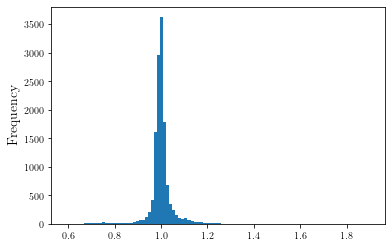

In [10]:
sm.rescale_weight.plot.hist(bins=100)

In [22]:
sm

,q2,k,l,p,J_comp,j_np,rescale_weight
0,9.628316,0.478162,1.973072,2.150869,0.774693,0.765446,0.988063
1,13.925506,2.673730,2.099772,0.498232,0.518445,0.514955,0.993269
2,4.750730,0.317639,1.702504,1.090045,1.221843,1.192475,0.975964
3,8.883428,0.226208,1.163226,1.884230,0.941570,0.927135,0.984669
4,5.367305,0.848416,2.470373,-0.844344,0.294392,0.267448,0.908478
...,...,...,...,...,...,...,...
13375,10.465174,0.129090,1.133012,-2.955900,0.917911,0.905702,0.986699
13376,15.473061,1.219828,0.322072,-1.792927,1.059041,1.067761,1.008233
13377,17.694974,1.902007,0.476926,-1.129403,1.039283,1.044014,1.004552
13378,13.123620,2.528305,1.605046,2.877888,0.265772,0.257318,0.968189


In [8]:
df_np = sm.iloc[:,:4].mul(sm['rescale_weight'], axis=0)

In [63]:
df_np.iloc[:10].apply(lambda x: compute_J_from_vec(x, wc_np), axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/flavio/physics/bdecays/bvll/qcdf_interpolate.py:33: UserWarning: The QCDF corrections should not be trusted for q2 above 6 GeV^2
  warnings.warn("The QCDF corrections should not be trusted for q2 above 6 GeV^2")


0    0.790907
1    0.524914
2    1.215505
3    0.915170
4    0.440741
5    0.861186
6    0.956171
7    1.234862
8    1.298942
9    1.394139
dtype: float64

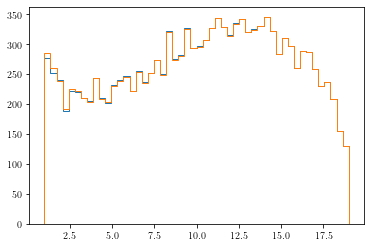

In [38]:
plt.hist(sm['q2'], bins=50, histtype='step')
plt.hist(sm['q2'], bins=50, histtype='step', weights=sm['rescale_weight'])
plt.show()

In [67]:
def compute_J_from_df(df, w):
    obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']
    
    # si = {obs: flavio.np_prediction('%s(B0->K*mumu)' % obs, w, df['q2']) for obs in obs_si}
    si = pd.DataFrame()
    for o in obs_si:
        si[o] = df['q2'].apply(
            lambda q2: flavio.np_prediction(f'{o}(B0->K*mumu)', w, q2)
        )

    return compute_J(si, df['k'], df['l'], df['p'])

In [75]:
wc_100 = flavio.WilsonCoefficients()

c9_busmsm = 100
c10_busmsm = 100

wc_100.set_initial({'C9_bsmumu' : c9_busmsm, 'C10_bsmumu' : c10_busmsm}, scale = 100)


sm['j_np_+100'] = compute_J_from_df(sm, wc_100)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/flavio/physics/bdecays/bvll/qcdf_interpolate.py:33: UserWarning: The QCDF corrections should not be trusted for q2 above 6 GeV^2
  warnings.warn("The QCDF corrections should not be trusted for q2 above 6 GeV^2")


In [76]:
sm['rescale_weight_+100'] = sm['j_np_+100'] / sm['J_comp']

KeyError: 'rescale_weight_100'

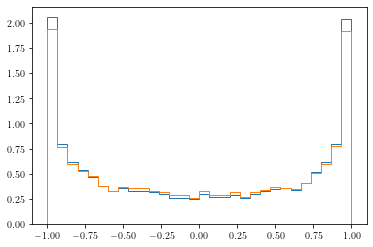

In [35]:
plt.hist(np.cos(sm['k']), bins=30, histtype='step', density=True, label='sm')
plt.hist(np.cos(sm['k']), bins=30, histtype='step', weights=sm['rescale_weight'], density=True, label='1, -1')
plt.hist(np.cos(sm['k']), bins=30, histtype='step', weights=sm['rescale_weight_100'], density=True, label='100, -100')
plt.hist(np.cos(sm['k']), bins=30, histtype='step', weights=sm['rescale_weight_+100'], density=True, label='100, 100')
plt.legend()
plt.show()

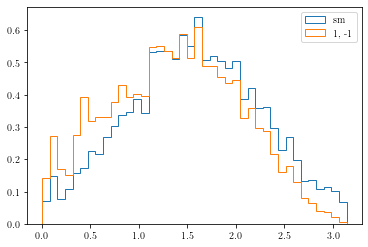

In [31]:
lowq = sm[(sm['q2'] < 6) & (sm['q2'] > 1)]
plt.hist((lowq['l']), bins=40, histtype='step', density=True, label='sm')
plt.hist((lowq['l']), bins=40, histtype='step', weights=lowq['rescale_weight'], density=True, label='1, -1')
# plt.hist(sm['k'], bins=30, histtype='step', weights=sm['rescale_weight_100'], density=True, label='100, -100')
# plt.hist(sm['k'], bins=30, histtype='step', weights=sm['rescale_weight_+100'], density=True, label='100, 100')
plt.legend()
plt.show()

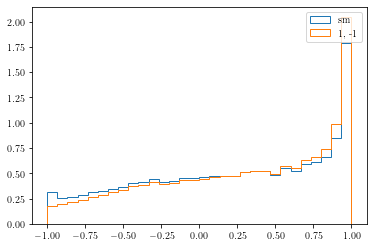

In [33]:
plt.hist(np.cos(sm['l']), bins=30, histtype='step', density=True, label='sm')
plt.hist(np.cos(sm['l']), bins=30, histtype='step', weights=sm['rescale_weight'], density=True, label='1, -1')
# plt.hist(np.cos(sm['l']), bins=30, histtype='step', weights=sm['rescale_weight_100'], density=True, label='100, -100')
# plt.hist(np.cos(sm['l']), bins=30, histtype='step', weights=sm['rescale_weight_+100'], density=True, label='100, 100')
plt.legend()
plt.show()

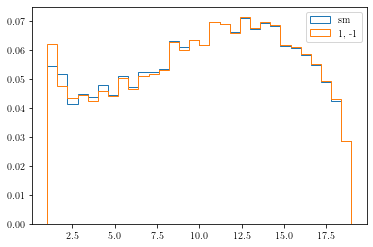

In [32]:
plt.hist(sm['q2'], bins=30, histtype='step', density=True, label='sm')
plt.hist(sm['q2'], bins=30, histtype='step', weights=sm['rescale_weight'], density=True, label='1, -1')
# plt.hist(np.cos(sm['l']), bins=30, histtype='step', weights=sm['rescale_weight_100'], density=True, label='100, -100')
# plt.hist(np.cos(sm['l']), bins=30, histtype='step', weights=sm['rescale_weight_+100'], density=True, label='100, 100')
plt.legend()
plt.show()

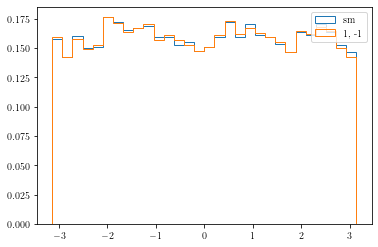

In [12]:
plt.hist(sm['p'], bins=30, histtype='step', density=True, label='sm')
plt.hist(sm['p'], bins=30, histtype='step', weights=sm['rescale_weight'], density=True, label='1, -1')
# plt.hist(np.cos(sm['l']), bins=30, histtype='step', weights=sm['rescale_weight_100'], density=True, label='100, -100')
# plt.hist(np.cos(sm['l']), bins=30, histtype='step', weights=sm['rescale_weight_+100'], density=True, label='100, 100')
plt.legend()
plt.show()

How do we propagate the weighting when taking cos?

In [99]:
sm_treated = sm[['q2', 'k', 'l', 'p']].copy()
sm_treated[['k', 'l']] = np.cos(sm_treated[['k', 'l']])

<ipython-input-115-cd09b93c2cd3>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(sm_treated, alpha=0.2, ax=ax, hist_kwds={'bins':20, 'alpha':0.8})


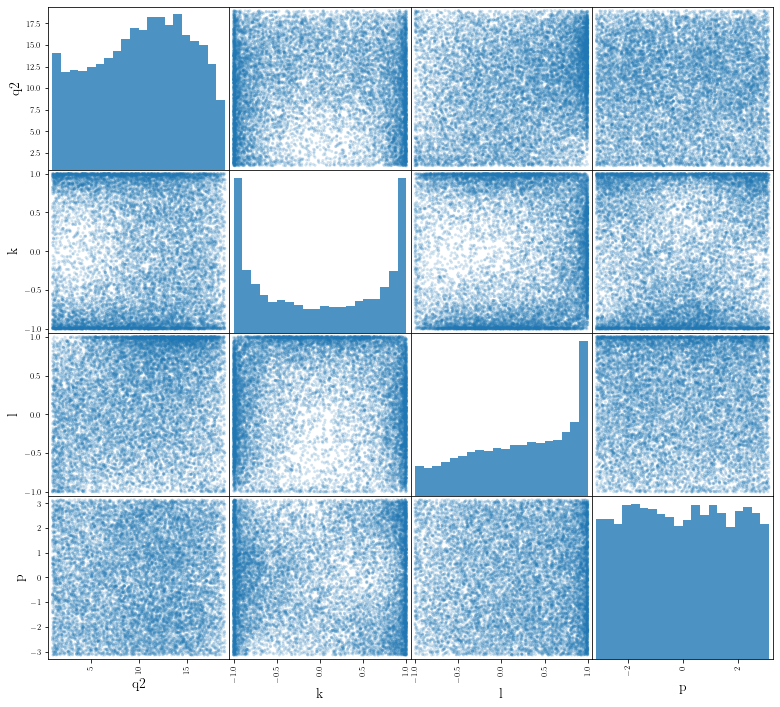

In [115]:
fig, ax = plt.subplots(figsize=(13,12))
pd.plotting.scatter_matrix(sm_treated, alpha=0.2, ax=ax, hist_kwds={'bins':20, 'alpha':0.8})
# pd.plotting.scatter_matrix(sm_treated, alpha=0.2, ax=ax, hist_kwds={'bins':20, 'alpha':0.8, 'weights':sm['rescale_weight_+100']})
plt.show()

<ipython-input-116-89cec89330d0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(sm_treated, alpha=0.2, ax=ax, hist_kwds={'bins':20, 'alpha':0.8, 'weights':sm['rescale_weight_+100']})


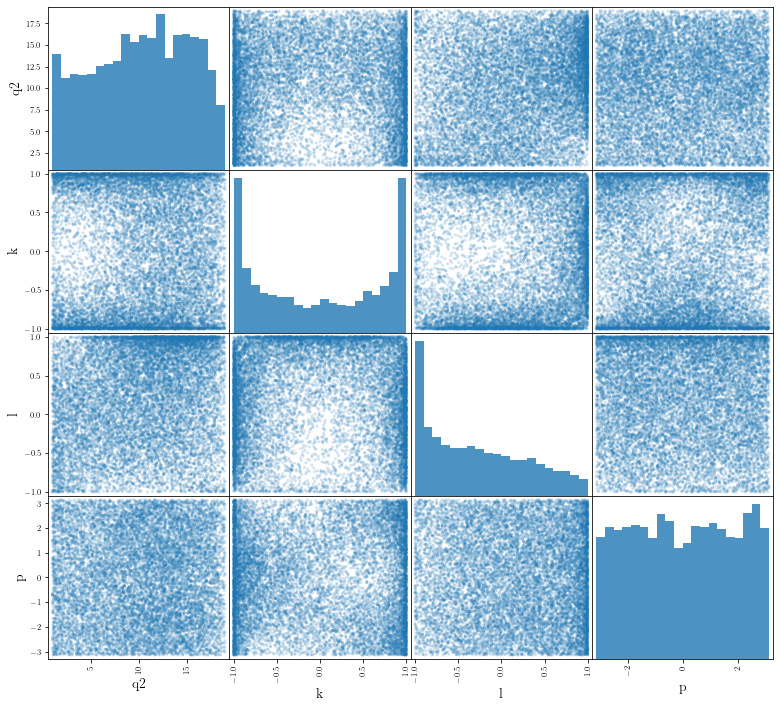

In [116]:
fig, ax = plt.subplots(figsize=(13,12))
# pd.plotting.scatter_matrix(sm_treated, alpha=0.2, ax=ax, hist_kwds={'bins':20, 'alpha':0.8})
pd.plotting.scatter_matrix(sm_treated, alpha=0.2, ax=ax, hist_kwds={'bins':20, 'alpha':0.8, 'weights':sm['rescale_weight_+100']})
plt.show()

# ML

AttributeError: 'PlotAccessor' object has no attribute 'scatter_matrix'